<h1 align=center><font size = 5>Credit Card Fraud Detection using Deep Learning</font></h1>

## Introduction

The aim of this project is to develop a deep learning model for detecting credit card fraud. To achieve this, we will use the <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data">Credit Card Fraud Detection</a> dataset from Kaggle. This dataset contains transaction records labeled as fraudulent or non-fraudulent, and our goal is to train a model that can accurately identify fraudulent transactions.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Download / Load Dataset

You can use the following code to download the dataset directly from Kaggle.

In [ ]:
# import kagglehub

# path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# print("Path to dataset files:", path)

You can also download the CSV file to your machine and load it using "read_csv" function.

In [4]:
df = pd.read_csv ('C:/Users/Persia system/Desktop/creditcard.csv')

Now that we have the dataset, let's play with it a bit to get to know it better.

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In the "Class" column, transactions are labeled as follows:
<li> 1 → Fraudulent transaction </li>
<li> 0 → Non-fraudulent transaction </li>
</br>
Now, let's examine the proportion of these two classes to understand the dataset's imbalance.

In [22]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


As observed, fraudulent transactions are much rarer compared to non-fraudulent ones. This class imbalance can cause issues during training, as the model may become biased toward predicting non-fraudulent transactions.

To address this, I will assign higher class weights to fraudulent cases. This ensures that the loss function places greater emphasis on detecting fraud, helping the model learn effectively without being dominated by the majority class.

However, before handling class imbalance, we first need to normalize the data to ensure all features are on the same scale.

### Normalize Data

In [23]:
scaler = StandardScaler()

In [24]:
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

The code above scales the feature values using the StandardScaler function. In deep learning projects, it is common practice to normalize only the input features, while the target values (labels) remain unchanged. Since our target column ("Class") consists of binary labels (0 for non-fraud and 1 for fraud), normalization is not necessary for it.

### Split Data into Train and Test Sets

In [25]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

Since fraudulent transactions are much rarer than non-fraudulent ones, training a model on the raw data may result in a bias toward predicting non-fraud cases. To counter this, we use class weights to give more importance to the minority class (fraudulent transactions).

The following code dynamically calculates class weights based on the data distribution:

In [26]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

### Build the Deep Learning Model

In [29]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

### Train the Model

In [31]:
history = model.fit (X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test), class_weight=class_weights_dict)

Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9523 - loss: 1.2432 - val_accuracy: 0.9867 - val_loss: 0.0979
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9739 - loss: 0.1967 - val_accuracy: 0.9949 - val_loss: 0.0470
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9690 - loss: 0.2678 - val_accuracy: 0.9960 - val_loss: 0.0403
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9737 - loss: 0.2106 - val_accuracy: 0.9890 - val_loss: 0.0698
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9690 - loss: 0.1562 - val_accuracy: 0.9924 - val_loss: 0.0638
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9585 - loss: 0.2079 - val_accuracy: 0.9930 - val_loss: 0.0326
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9726 - loss: 0.1357 - val_accuracy: 0.9768 - val_loss: 0.1277
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9540 - loss: 0

### Evaluate the Model

In [33]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.89      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

//////////////////
ROC AUC Score: 0.9397272977846175


I used "> 0.5" because the model outputs a probability between 0 and 1 because the final activation function is sigmoid.
Using "> 0.5" converts these probabilities into binary labels (0 or 1).

The "classification_report()" function provides a detailed breakdown of the model’s performance.

The ROC AUC (Receiver Operating Characteristic - Area Under the Curve) Score evaluates the model’s ability to distinguish between fraudulent and non-fraudulent transactions.

### Visualize Results

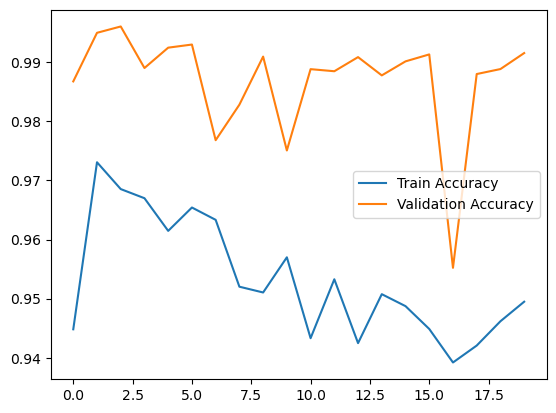

In [34]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### Thanks for your time

Author: [Mohammadmehdi Omidi](https://www.linkedin.com/in/mohammadmehdi-omidi/)

I hope you found this notebook useful.